Immediate thoughts:

- Use the two databases I found to see what kinds of wind turbines were built where. Find characteristics of the wind at those locations. Then, find similar locations. Finally, suggest the kind of turbines built there based on their characteristics. This can look basically like a k-means clustering alg (or some other clustering algorithm).
- See if any database has information on how individual turbines are doing. Might be telling.

In [1]:
import pandas as pd

In [9]:
wt_df = pd.read_csv('uswtdbCSV/uswtdb_v1_2_20181001.csv')

In [10]:
wt_df.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,...,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3073429,missing,missing,4960,CA,Kern County,6029,251 Wind,1987,194,...,-9999.0,-9999.0,-9999.0,-9999.0,2,3,1/1/2012,NAIP,-118.360725,35.083778
1,3071522,missing,missing,4997,CA,Kern County,6029,251 Wind,1987,194,...,-9999.0,-9999.0,-9999.0,-9999.0,2,3,1/1/2012,NAIP,-118.361168,35.081512
2,3073425,missing,missing,4957,CA,Kern County,6029,251 Wind,1987,194,...,-9999.0,-9999.0,-9999.0,-9999.0,2,3,1/1/2012,NAIP,-118.360420,35.084709
3,3071569,missing,missing,5023,CA,Kern County,6029,251 Wind,1987,194,...,-9999.0,-9999.0,-9999.0,-9999.0,2,3,7/31/2016,Digital Globe,-118.364029,35.079418
4,3005252,missing,missing,5768,CA,Kern County,6029,251 Wind,1987,194,...,-9999.0,-9999.0,-9999.0,-9999.0,2,3,11/23/2017,Digital Globe,-118.354286,35.085594


In [11]:
wt_df.columns

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 't_state', 't_county',
       't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu', 't_model',
       't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr', 't_conf_loc',
       't_img_date', 't_img_srce', 'xlong', 'ylat'],
      dtype='object')

In [12]:
wt_df['t_conf_loc'].unique()

array([3, 2, 1])

In [13]:
wt_df['t_cap'].unique()

array([   95,  3000,  1680,  1500,  1600,  1800,  2300,  2415,  2346,
        1670,   660,  1000,  2100,  1650,  2000,   600,   160,   225,
        2850,  1700,  1850,   100, -9999,  3450,  2500,   750,  1790,
          50,   250,  2400,   900,  1750,   108,  1250,  3300,  1620,
        3200,  6000,  1715,   360,   700,  2050,  1300,  3075,  3600,
         150,   400,   500,    65,   105,   950,   120,   595,  1200,
         230,   275,    70,   550,    90,   850,  2200,   450,  1815,
         650,   710,   800,   200,  1860,    75,  2370,  3150,  2625,
        2075,   350,    60,  3570,    80,  2350,   110,    40])

In [14]:
wt_df['t_rd'].unique()

array([-9999. ,   125. ,    82.5,    77. ,    80. ,    93. ,   108. ,
          85.5,    47. ,    88. ,    82. ,    87. ,    44. ,    90. ,
          23. ,    27. ,   103. ,   100. ,   116. ,   114. ,    21. ,
         126. ,    61.4,   110. ,    54. ,    14. ,   101. ,    97. ,
         117. ,    56. ,    66. ,    18.9,    64. ,   112. ,   113. ,
         150. ,    72. ,    70.5,    33. ,    50. ,    30. ,    92.5,
         102. ,    91. ,    96. ,    48. ,    60. ,   107. ,    34. ,
          39. ,    15. ,    17. ,    13. ,    19.4,    24.6,    59. ,
          95. ,    45. ,    43. ,    32. ,    40. ,    92. ,    52. ,
         120. ,    29. ,    58. ,    42. ,    62. ,    86. ,    19.1,
          41. ,    52.2,    57. ,    83. ,    16.5,   111. ,    29.1,
          15.3,    99. ,    82.3,    16. ,    86.8,   109. ,    20. ,
          13.4,    11. ,    15.5,    89. ,    37. ,   136. ,    70. ,
          18. ,    65. ,    25. ])

## Location Properties

144.722656
-171.713074


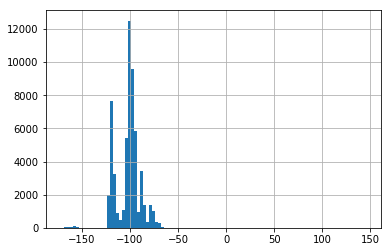

In [22]:
%matplotlib inline

print(max(wt_df['xlong']))
print(min(wt_df['xlong']))

wt_df['xlong'].hist(bins=100)

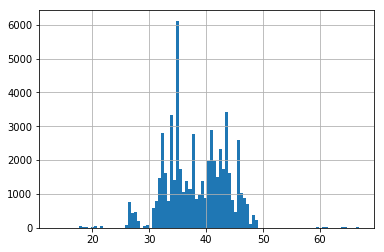

In [21]:
wt_df['ylat'].hist(bins=100)

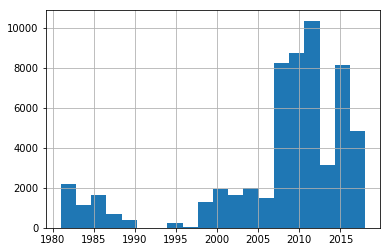

In [31]:
wt_df[wt_df['p_year'] > 0]['p_year'].hist(bins=20)

Most turbines built in the US were built between 2005ish and 2015. There seems to be a slump recently.

count    58185.000000
mean      -101.650869
std         12.355997
min       -171.713074
25%       -107.410889
50%       -100.247490
75%        -95.512985
max        144.722656
Name: xlong, dtype: float64


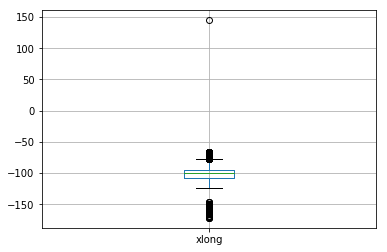

In [41]:
print(wt_df['xlong'].describe())

wt_df.boxplot(column=['xlong'])

count    58185.000000
mean        38.404512
std          5.317913
min         13.389381
25%         34.692432
50%         37.874695
75%         42.688694
max         66.839905
Name: ylat, dtype: float64


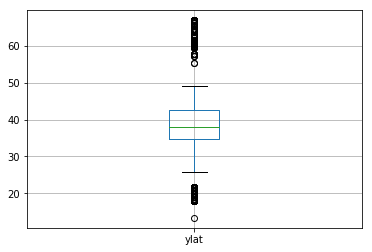

In [42]:
print(wt_df['ylat'].describe())

wt_df.boxplot(column=['ylat'])

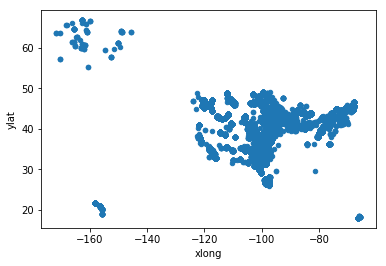

In [45]:
wt_df_without_outlier = wt_df[wt_df['xlong'] < 100]

wt_df_without_outlier.plot.scatter(x='xlong', y='ylat')

Super cool. We can actually see how wind turbines are mapped out across the US

Next, look at the

- dist of turbine attributes
- how different turbine attributes compare location-wise (ie is there a different dist long and lat based on different max capacities
- compare different project attributes and location

## Wind Turbine Properties

In [46]:
wt_df['t_cap'].unique()

array([   95,  3000,  1680,  1500,  1600,  1800,  2300,  2415,  2346,
        1670,   660,  1000,  2100,  1650,  2000,   600,   160,   225,
        2850,  1700,  1850,   100, -9999,  3450,  2500,   750,  1790,
          50,   250,  2400,   900,  1750,   108,  1250,  3300,  1620,
        3200,  6000,  1715,   360,   700,  2050,  1300,  3075,  3600,
         150,   400,   500,    65,   105,   950,   120,   595,  1200,
         230,   275,    70,   550,    90,   850,  2200,   450,  1815,
         650,   710,   800,   200,  1860,    75,  2370,  3150,  2625,
        2075,   350,    60,  3570,    80,  2350,   110,    40])

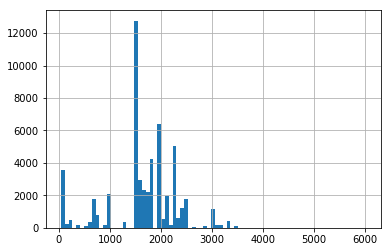

In [50]:
wt_df_tcap_notmissing = wt_df[wt_df['t_cap'] >= 0]['t_cap']

wt_df_tcap_notmissing.hist(bins=wt_df_tcap_notmissing.nunique())

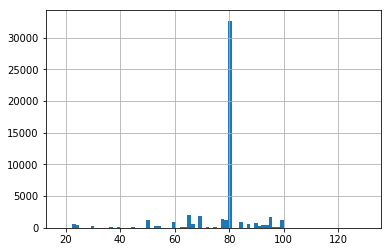

In [52]:
wt_df_thh_notmissing = wt_df[wt_df['t_hh'] >= 0]['t_hh']

wt_df_thh_notmissing.hist(bins=wt_df_thh_notmissing.nunique())

An overwhelming majority are about 80 meters tall, it looks like

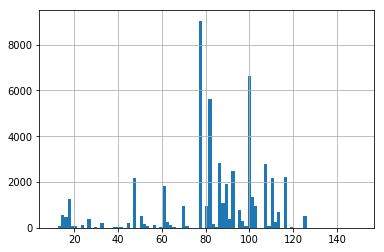

In [54]:
wt_df_trd_notmissing = wt_df[wt_df['t_rd'] >= 0]['t_rd']

wt_df_trd_notmissing.hist(bins=wt_df_trd_notmissing.nunique())

Lot more variation here

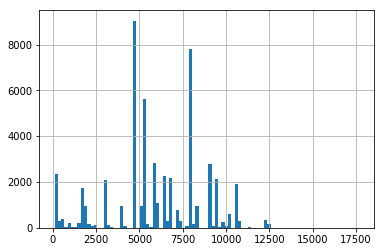

In [55]:
wt_df_trsa_notmissing = wt_df[wt_df['t_rsa'] >= -9000]['t_rsa']

wt_df_trsa_notmissing.hist(bins=wt_df_trsa_notmissing.nunique())

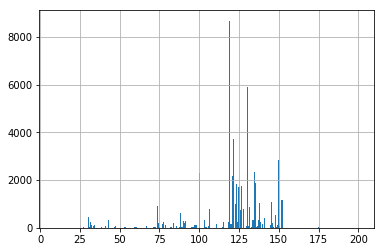

In [58]:
wt_df_tttlh_notmissing = wt_df[wt_df['t_ttlh'] >= -9000]['t_ttlh']

wt_df_tttlh_notmissing.hist(bins=wt_df_tttlh_notmissing.nunique())

## Turbine Properties by Location

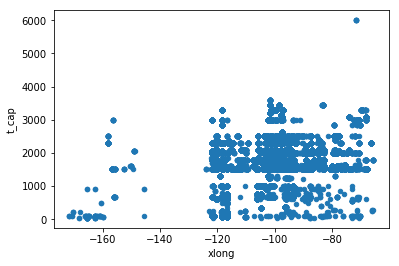

In [61]:
_wt_df = wt_df[wt_df['t_cap'] >= 0]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='t_cap')

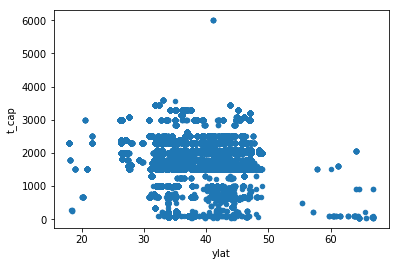

In [62]:
_wt_df.plot.scatter(x='ylat', y='t_cap')

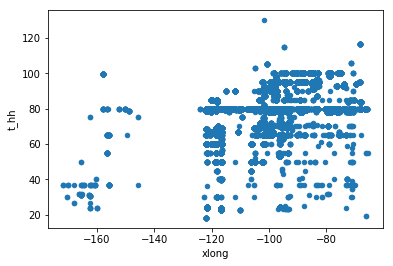

In [64]:
_wt_df = wt_df[wt_df['t_hh'] >= 0]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='t_hh')

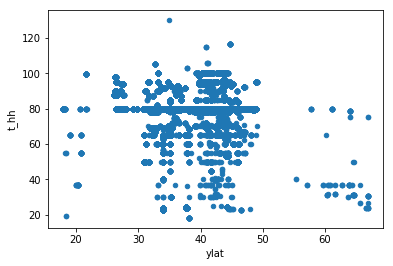

In [65]:
_wt_df.plot.scatter(x='ylat', y='t_hh')

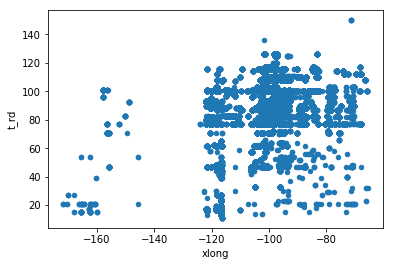

In [66]:
_wt_df = wt_df[wt_df['t_rd'] >= 0]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='t_rd')

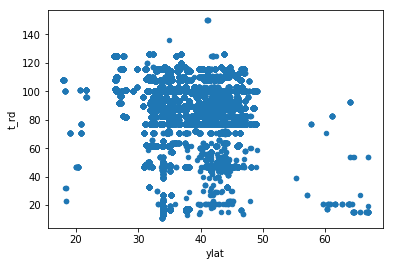

In [67]:
_wt_df.plot.scatter(x='ylat', y='t_rd')

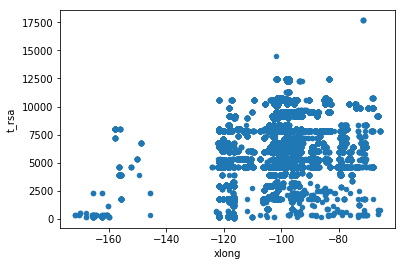

In [68]:
_wt_df = wt_df[wt_df['t_rsa'] >= 0]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='t_rsa')

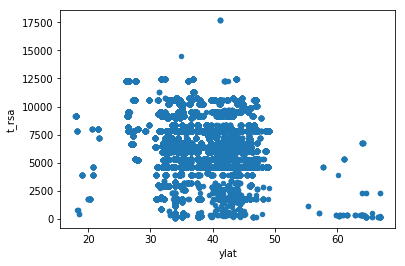

In [70]:
_wt_df.plot.scatter(x='ylat', y='t_rsa')

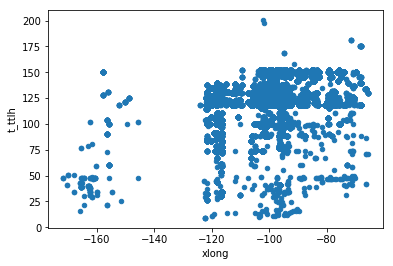

In [71]:
_wt_df = wt_df[wt_df['t_ttlh'] >= 0]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='t_ttlh')

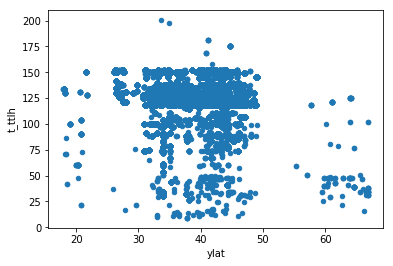

In [72]:
_wt_df.plot.scatter(x='ylat', y='t_ttlh')

- NOTE: I should 1) Get a list of the x/y indices for all turbine locations, then get that data and compare to locations without turbines and see if there's any difference in dist

First....

## Project Properties

In [73]:
print(wt_df['p_tnum'].unique())

print(wt_df['p_cap'].unique())

[ 194   10    2    1   76   60    4   12    3   36   21    8   40  100
   50   34  115   42   56   44   43   48   41    7   65  110  104   55
    5   29   90   67   80   39  131  101   64  162   57   85  122   87
  120   18  133   25  114   66   14   49   51   53   16   35   68  132
   26   54   45   84  152   88   23    6   27   75   61   99   81   62
   30    9  112   38  135   74  155   15   24  105   73  180   19   13
  134   59  111  143  124   28   47   20   11  150  221   63  139   33
   17  140   72  108   58  107   31  109  250  215   78   70  142   22
  137  262   32   69   86  182   71  145   83  200  118  170 1400  148
   37  211  149  116  197  125  163  106   91  130   92  214  138   79
   52   94  117  126   96  121  460  156   46   82  136   97  169  147
   95   77  201  267  103  119  166   93  193  209  342  268  232  157
  213   89  113   98  102  164  127  242  189 1831]
[ 1.84300e+01  3.00000e+01  3.36000e+00  3.00000e+00  1.60000e+00
  3.60000e+00  1.74800e+02  1.

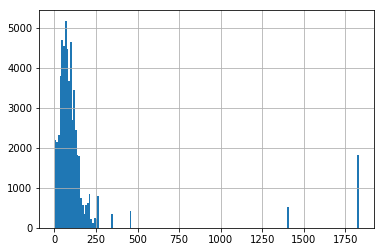

In [74]:
wt_df['p_tnum'].hist(bins=wt_df['p_tnum'].nunique())

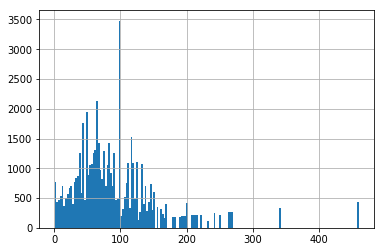

In [78]:
# Remove the extreme values to get a better view of dist

wt_df_ptnum_notextreme = wt_df[wt_df['p_tnum'] < 1000]['p_tnum']

wt_df_ptnum_notextreme.hist(bins=wt_df_ptnum_notextreme.nunique())

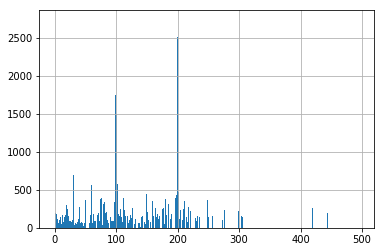

In [76]:
wt_df_pcap_notmissing = wt_df[wt_df['p_cap']>=0]['p_cap']

wt_df_pcap_notmissing.hist(bins=wt_df_pcap_notmissing.nunique())

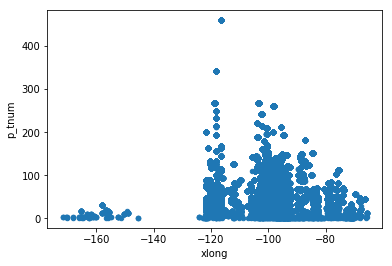

In [80]:
_wt_df = wt_df[wt_df['p_tnum'] <= 1000]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='p_tnum')

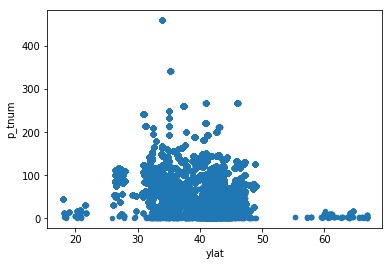

In [81]:
_wt_df.plot.scatter(x='ylat', y='p_tnum')

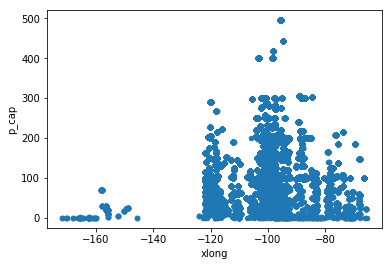

In [83]:
_wt_df = wt_df[wt_df['p_cap'] >= 0]
_wt_df = _wt_df[_wt_df['xlong'] < 100]

_wt_df.plot.scatter(x='xlong', y='p_cap')

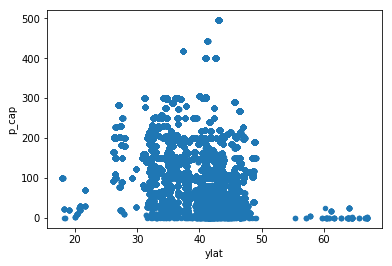

In [85]:
_wt_df.plot.scatter(x='ylat', y='p_cap')

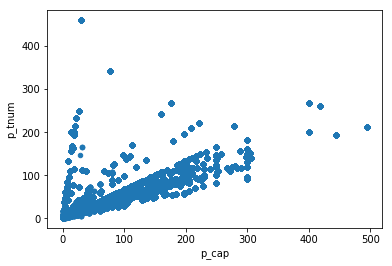

In [88]:
_wt_df = wt_df[wt_df['p_cap'] >= 0]
_wt_df = _wt_df[_wt_df['p_tnum'] <= 500]

_wt_df.plot.scatter(x='p_cap', y='p_tnum')
_wt_df.plot.scatter(x='p_cap', y='p_tnum')

Although a majority seem to follow a pretty expected relationship (number of turbines increase as capacity increases), there are several trends here. Specifically, it looks like there are cases where there are hundreds of turbines but they produce little energy. On the other hand, there seem to be a number of cases where a lot of energy is produced by relatively few number of turbines. Why are these capacities set like this???? 

Idea: I could check whether these turbines are found in distinct geographical regions, or were established certain years.

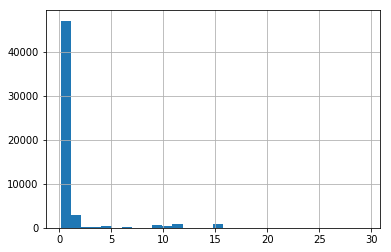

In [91]:
tnum_over_cap = _wt_df['p_tnum'] / _wt_df['p_cap']

tnum_over_cap.hist(bins=30)

In [98]:
high_tnum_over_cap = _wt_df[tnum_over_cap >= 13] # means that the number of turbines is high but capacity rating seems low
middle_tnum_over_cap = _wt_df[(tnum_over_cap >= 4) & (tnum_over_cap < 13)] # Means there's a middle ground where number of turbines is highish and capacity is too
low_tnum_over_cap = _wt_df[(tnum_over_cap < 4) & (tnum_over_cap >= 0)] # BAsically, fewer turbines but large amount of capacity


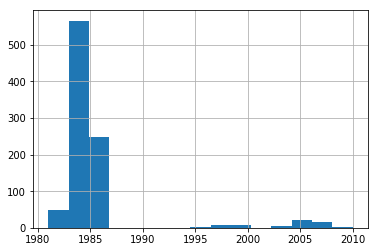

In [99]:
high_tnum_over_cap['p_year'].hist(bins=high_tnum_over_cap['p_year'].nunique())

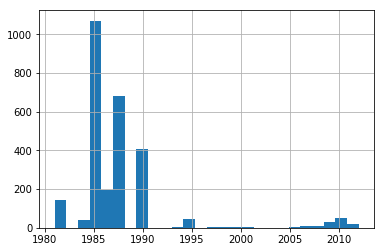

In [100]:
middle_tnum_over_cap['p_year'].hist(bins=middle_tnum_over_cap['p_year'].nunique())

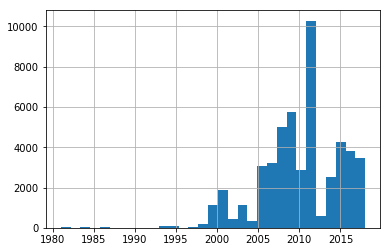

In [102]:
low_tnum_over_cap_without_missing = low_tnum_over_cap[low_tnum_over_cap['p_year'] > 1970]['p_year']

low_tnum_over_cap_without_missing.hist(bins=low_tnum_over_cap_without_missing.nunique())

As expected, the rated capacity seems to be primarily be based on year. I'll check based on geographical location anyway though

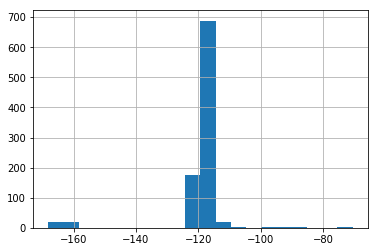

In [105]:
high_tnum_over_cap['xlong'].hist(bins=20)

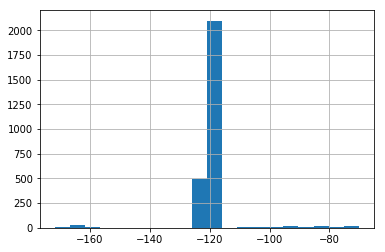

In [106]:
middle_tnum_over_cap['xlong'].hist(bins=20)

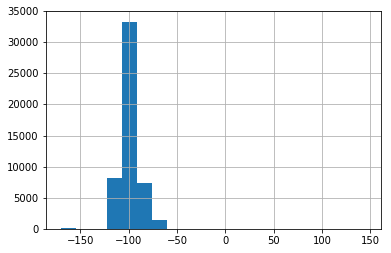

In [107]:
low_tnum_over_cap['xlong'].hist(bins=20)

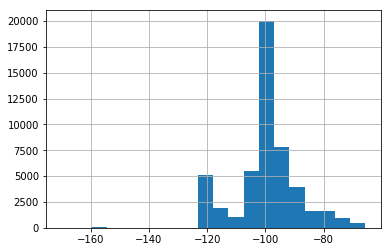

In [108]:
_low_tnum_over_cap_xlong = low_tnum_over_cap[low_tnum_over_cap['xlong'] < 0]['xlong']
_low_tnum_over_cap_xlong.hist(bins=20)

Interesting. The low slope ones (newer, more capacity per turbine) are centered around -100 long. The lower capacity-per-turbine, older projects were built mainly in the west, but more recently turbines were built in the midwest. Is there something to this trend???

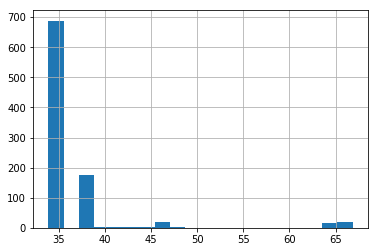

In [109]:
high_tnum_over_cap['ylat'].hist(bins=20)

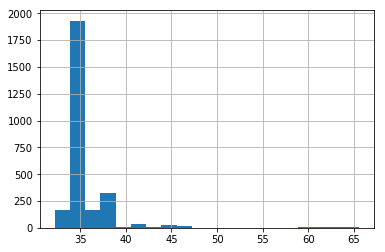

In [110]:
middle_tnum_over_cap['ylat'].hist(bins=20)

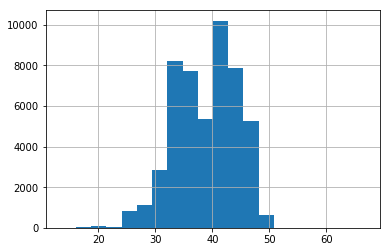

In [111]:
low_tnum_over_cap['ylat'].hist(bins=20)

Also recently, it looks like turbines were moved north, so it seems that turbines not only 1) got better capacity per turbine, but 2) moved northeast in the project sites.

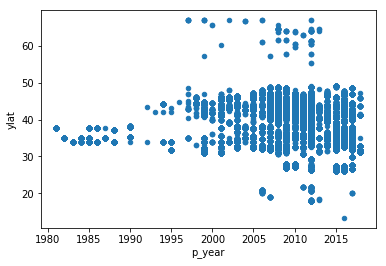

In [113]:
_wt_df_legit_years = _wt_df[_wt_df['p_year'] > 0]

_wt_df_legit_years.plot.scatter(x='p_year', y='ylat')

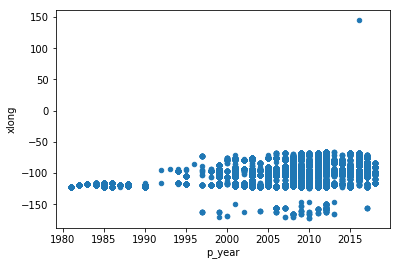

In [114]:
_wt_df_legit_years.plot.scatter(x='p_year', y='xlong')

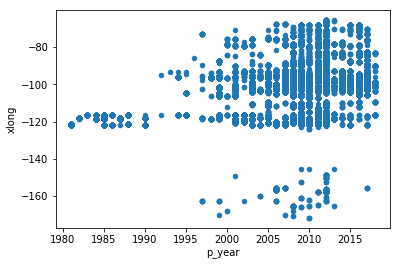

In [115]:
_wt_df_legit_years_without_extreme_long = _wt_df_legit_years[_wt_df_legit_years['xlong'] < 0]

_wt_df_legit_years_without_extreme_long.plot.scatter(x='p_year', y='xlong')

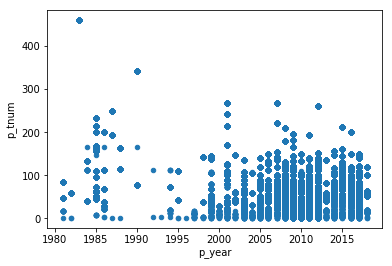

In [125]:
_wt_df_legit_years_without_extreme_long.plot.scatter(x='p_year', y='p_tnum')

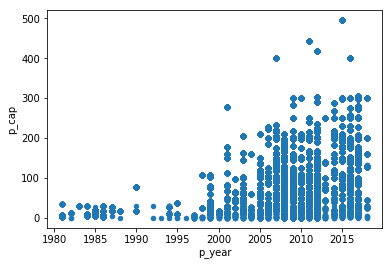

In [126]:
_wt_df_legit_years_without_extreme_long.plot.scatter(x='p_year', y='p_cap')

Seems like capacity of entire projects trended up as years went on, although there were still low capacity projects being built recently.

## Turbine Properties Revisited

- Should check out the properties I visited earlier, specifically is the properties of individual turbines has changed over time or geography, and how different features interact.

In [120]:
from pandas.plotting import scatter_matrix

turbine_df = wt_df[['t_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 'p_year']].copy()
turbine_df = turbine_df[(turbine_df > -9000).all(axis=1)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136d792e8>,
      dtype=object)

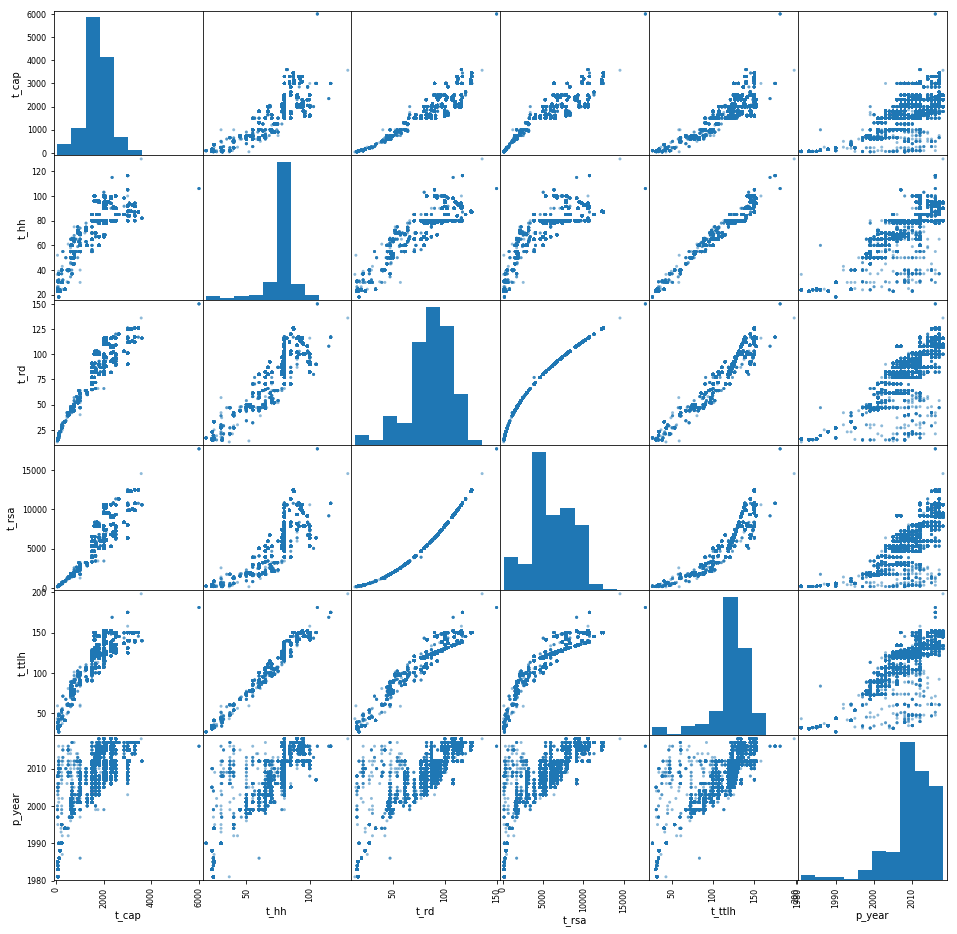

In [121]:
scatter_matrix(turbine_df, figsize=(16.0, 16.0))

This is pretty informative. Let's dissect this...

### Turbine Capacity:
- Positively correlated with hh (hub height?)
- Positively correlated with rd (rotor diameter?)
- Positively correlated with rsa ()
- Positively correlated with ttlh
- Generally, newer turbines tend to have higher capacities

### Hub Height
- Positively correlated with rd
- Positively correlated with rsa
- Positively correlated with ttlh
- Generally, newer turbines have greater hh

### RD
- Very positively correlated with rsa. Not sure what RSA is but it probably has to do with rotors.
- Positively correlated with ttlh (I think this may be total height?)
- Newer turbines have larger rd

### RSA (Rotor surface area???)
- Positively correlated with ttlh
- Newer turbines have higher RSA values, generally

### TTLH
- Generally, newer turbines have larger ttlh

It's relatively clear that as time went on, turbines have had greater capacities, greater height, and greater rotor diameters. It's also interesting that capacity increases as height and rotor diameter increases. This all makes sense, I suppose, but it indicates to me that there's generally more capacity the higher the hub is.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c2a55f8>,
      dtype=object)

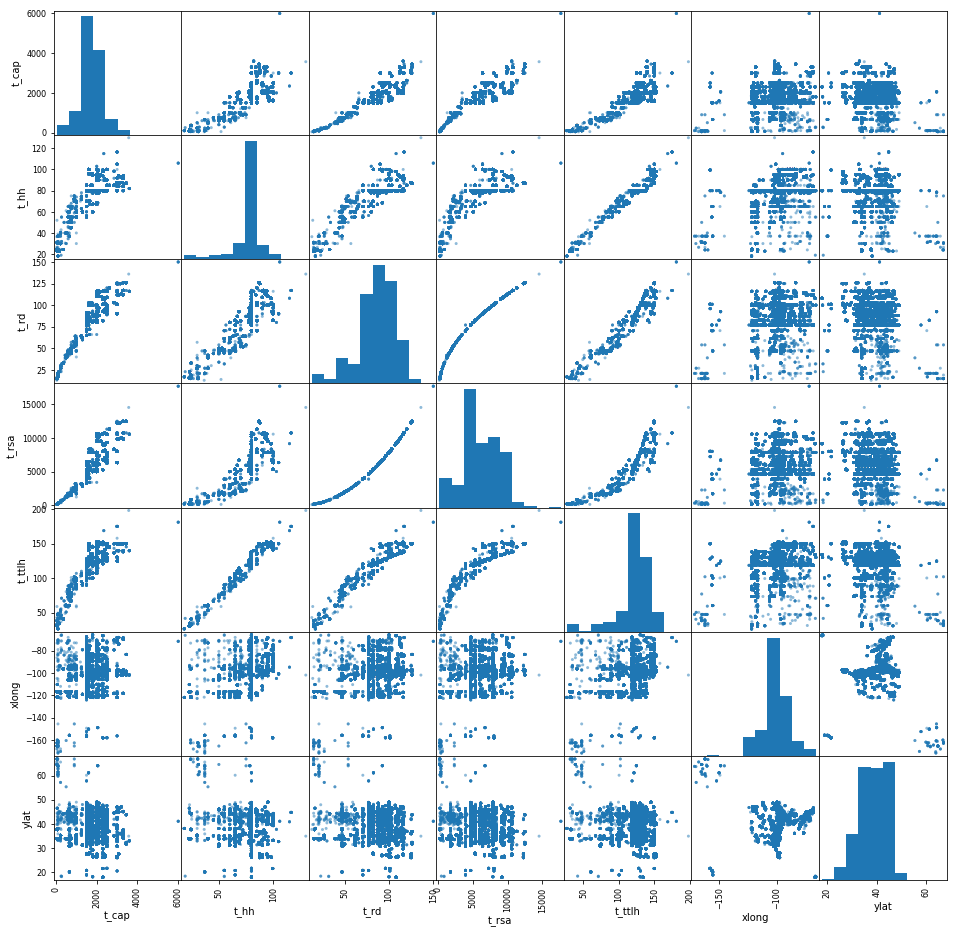

In [123]:
turbine_df = wt_df[['t_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 'xlong', 'ylat']].copy()
turbine_df = turbine_df[(turbine_df > -9000).all(axis=1) & (turbine_df['xlong'] < 130)]
scatter_matrix(turbine_df, figsize=(16.0, 16.0))

At this point, I've looked into turbine and project data quite a bit. Some of the interesting finds are that

- As time went on, projects spread from west to east
- As time went on, projects spread from south to north
- As time went on, capacity per turbine increased/turbine per capacity decreased.
- As time went on, individual turbines had greater capacities
- As time went on, individual turbines had greater height
- As time went on, individual turbines had greater rotor diameters
- Capacity seems to be correlated with height and rotor diameter
- Doesn't seem to be a real trend between longitude and latitude and any of the turbine features.

## Time to look at wind data

Now that I've explored a little bit about turbines and how they differ, particularly over coordinates and years, I can start looking at wind characteristics of the turbine locations.

#### Game Plan

- For all turbines, get longitude and lattitude. 
- Translate the lat/long coordinates into x/y indices used by the wind dataset
- Get wind data for each turbine's location for a year? Might have to do some sampling here
- Check out distributions on wind. For e.g., could see if the height of the turbine is, on average, the height at which wind speed is faster. Could also check if wind speed is consistently faster at certain heights than others.

In [127]:
import h5pyd
from pyproj import Proj

# Grabbed from the intro demo notebook at https://www.nrel.gov/grid/wind-toolkit.html
f = h5pyd.File("/nrel/wtk-us.h5", 'r') 
list(f)

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

In [169]:
# This function also grabbed from https://www.nrel.gov/grid/wind-toolkit.html
# It's a simple way to get the x, y coordinates based on lat and long without loading the coordinate data set
def indicesForCoord(f, lat, lon):
    dset_coords = f['coordinates']
    projstring = """+proj=lcc +lat_1=30 +lat_2=60 
                    +lat_0=38.47240422490422 +lon_0=-96.0 
                    +x_0=0 +y_0=0 +ellps=sphere 
                    +units=m +no_defs """
    projectLcc = Proj(projstring)
    origin_ll = reversed(dset_coords[0][0])  # Grab origin directly from database
    origin = projectLcc(*origin_ll)
    
    coords = (lon, lat)
    coords = projectLcc(*coords)
    delta = np.subtract(coords, origin)
    ij = [int(round(x/2000)) for x in delta]
    return tuple(reversed(ij))

In [168]:
import numpy as np

# Test this function

long = wt_df.iloc[0]['xlong']
lat = wt_df.iloc[0]['ylat']
idx = indicesForCoord(f, lat, long)

print(lat, long)
print(f["coordinates"][idx[0]][idx[1]])


35.083778 -118.360725
(35.084087, -118.363037)


In [181]:
dset_coords = f['coordinates']
projstring = """+proj=lcc +lat_1=30 +lat_2=60 
                    +lat_0=38.47240422490422 +lon_0=-96.0 
                    +x_0=0 +y_0=0 +ellps=sphere 
                    +units=m +no_defs """
projectLcc = Proj(projstring)
origin_ll = reversed(dset_coords[0][0])  # Grab origin directly from database
origin = projectLcc(*origin_ll)

def updatedIndicesForCoord(f, origin, projectLcc, lat, lon):
    coords = (lon, lat)
    coords = projectLcc(*coords)
    delta = np.subtract(coords, origin)
    ij = [int(round(x/2000)) for x in delta]
    return tuple(reversed(ij))

# _xy = wt_df.apply(indicesForCoord, axis=0)
_xy = wt_df[['ylat','xlong']].apply(lambda x: updatedIndicesForCoord(f, origin, projectLcc, *x), axis=1)
# _xy = indicesForCoord(f, wt_df['ylat'], wt_df['xlong'])

In [184]:
wt_df['coord_idx'] = _xy

In [185]:
list(f)

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

Might want to start by looking at all turbines that are a certain height +/- rotor diameter/2, then getting wind speed at those wind turbines.

In [187]:
datetime_set = f['datetime']

In [188]:
datetime_set[0]

b'20070101000000'

In [189]:
datetime_set[-1]

b'20131231230000'

In [190]:
len(datetime_set)

61368

In [191]:
datetime_set[61367]

b'20131231230000'

In [192]:
datetime_set[2]

b'20070101020000'

In [194]:
# There are 11318 unique coordinate indices here, which means whatever analysis I do,
# I'll end up doing on 11318 different locations (to cover all turbines)
wt_df['coord_idx'].nunique()

11318

In [239]:
turbines_80_120 = wt_df[(wt_df['t_hh'] > 95) & (wt_df['t_hh'] < 105)]

In [240]:
len(turbines_80_120)

1629

In [241]:
coordinates_80_120 = turbines_80_120['coord_idx'].unique()

In [242]:
len(coordinates_80_120)

492

In [243]:
windspeed_100_dataset = f['windspeed_100m']

In [254]:
# print(windspeed_100_dataset[coordinates_80_120])

_coordinate = coordinates_80_120[0]
windspeed_100_dataset[0, _coordinate[0], _coordinate[1]]

windspeed_100 = []

i = 0
for coordinate in coordinates_80_120:
    if (i % 100 == 0):
        print(i)
    i += 1
    windspeed_100.append(windspeed_100_dataset[0:8928, coordinate[0], coordinate[1]])

# windspeed_100 = windspeed_100_dataset[coordinates_80_120]

0
100
200
300
400


In [255]:
len(windspeed_100)

492

In [260]:
windspeed_100_avg = np.apply_along_axis(np.mean, 1, windspeed_100)

In [261]:
windspeed_100_avg[0]

7.9507027

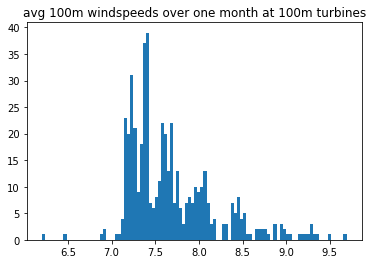

In [266]:
import matplotlib.pyplot as plt
plt.hist(windspeed_100_avg, bins=100)
plt.title('avg 100m windspeeds over one month at 100m turbines')
plt.show()

In [276]:
turbines_55_65 = wt_df[(wt_df['t_hh'] > 55) & (wt_df['t_hh'] < 65)]

In [277]:
len(turbines_55_65)

963

In [278]:
coordinates_55_65 = turbines_55_65['coord_idx'].unique()

In [279]:
len(coordinates_55_65)

117

In [281]:
windspeed_60_dataset = f['windspeed_60m']

def getDataForCoordinates(coords, dataset):
    speed = []
    
    i = 0
    for coordinate in coords:
        if (i % 100 == 0):
            print(i)
        i += 1
        speed.append(dataset[0:8928, coordinate[0], coordinate[1]])
        
    return speed
        
windspeed_60 = getDataForCoordinates(coordinates_55_65, windspeed_60_dataset)

0
100


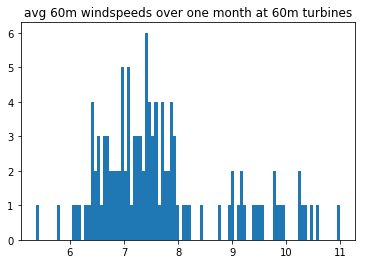

In [282]:
windspeed_60_avg = np.apply_along_axis(np.mean, 1, windspeed_60)
plt.hist(windspeed_60_avg, bins=100)
plt.title('avg 60m windspeeds over one month at 60m turbines')
plt.show()

NOTE: Seems like 60 avg is a spread out a little different (but generally pretty similar)

0
100


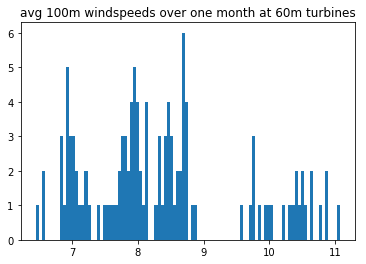

In [284]:
windspeed_100_for_60_turbines = getDataForCoordinates(coordinates_55_65, windspeed_100_dataset)
windspeed_100_for_60_turbines_avg = np.apply_along_axis(np.mean, 1, windspeed_100_for_60_turbines)
plt.hist(windspeed_100_for_60_turbines_avg, bins=100)
plt.title('avg 100m windspeeds over one month at 60m turbines')
plt.show()

Hello, wind speed is higher at 100m than 60m generally, it seems. Distribution is a little stranger. Notice also the 100m wind speed distribution for locations with 100m turbines is very different than the 100m speed distribution for the 60m turbine location

In [287]:
windspeed_60_for_100_turbines = getDataForCoordinates(coordinates_80_120, windspeed_60_dataset)

0
100
200
300
400


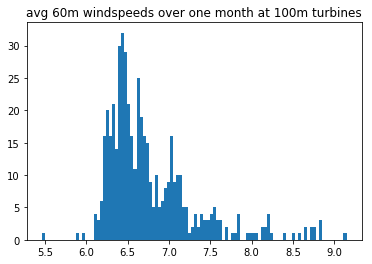

In [288]:
windspeed_60_for_100_turbines_avg = np.apply_along_axis(np.mean, 1, windspeed_60_for_100_turbines)
plt.hist(windspeed_60_for_100_turbines_avg, bins=100)
plt.title('avg 60m windspeeds over one month at 100m turbines')
plt.show()

Distribution here seems different as well. Wind speed at 60m is lower on average than that at 100m for the 100m turbines.

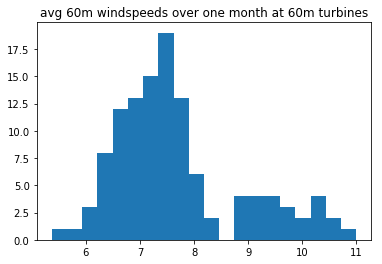

In [298]:
plt.hist(windspeed_60_avg, bins=20)
plt.title('avg 60m windspeeds over one month at 60m turbines')
plt.show()

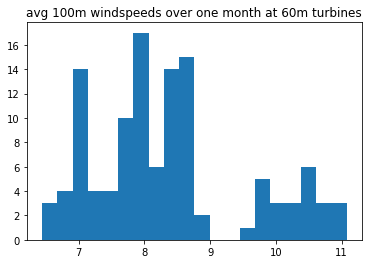

In [297]:
windspeed_100_for_60_turbines_avg = np.apply_along_axis(np.mean, 1, windspeed_100_for_60_turbines)
plt.hist(windspeed_100_for_60_turbines_avg, bins=20)
plt.title('avg 100m windspeeds over one month at 60m turbines')
plt.show()

In [291]:
list(f)

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

So now what? Ideas for analysis:

- We have pressure, relative humidty (near the ground), temperature, winddirection, and windspeed. Also Inverse Monin Obukhov Length, which is a measure of a property of turbulance (https://en.wikipedia.org/wiki/Monin%E2%80%93Obukhov_length). 
- We also have locations of turbines. We can likely assume all other areas (ie coordinates) are non-turbine areas.
- Using distribution information regarding temp, winddirection, windspeed, and so on, we can extract info/features on the turbine and non-turbine areas.
- Then, we can essentially cluster and use that (and the turbine data) to see if we can discern different information: Where should turbines be placed? What should the heights, rotor diameters, and capacities of those turbines be? 
- We can try to cut down on the amount of data by sampling wind forecasts (ie we can get one forecast per hour for an entire year, for e.g.)
- We can also try to cut down by looking at the placement of transmission lines and only searching areas near those, because laying power line is a major cost.
- Also, we can just look at areas near existing turbines.

In [293]:
windspeed_200_dataset = f['windspeed_200m']

windspeed_200_for_60_turbines = getDataForCoordinates(coordinates_55_65, windspeed_200_dataset)

0
100


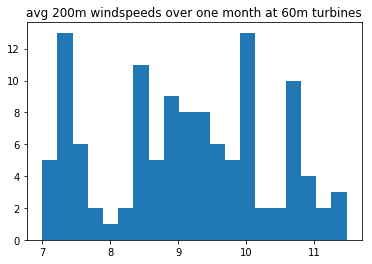

In [296]:
windspeed_200_for_60_turbines_avg = np.apply_along_axis(np.mean, 1, windspeed_200_for_60_turbines)
plt.hist(windspeed_200_for_60_turbines_avg, bins=20)
plt.title('avg 200m windspeeds over one month at 60m turbines')
plt.show()

We see that, generally, wind speed seems to increase the higher we go. However, we also see that distribution generally looks different as we increase. I wonder if we need to know the rated capacity speed of turbines to know what's good though

In [302]:
def getDataForCoordinatesForYear(coords, dataset):
    speed = []
    
    i = 0
    for coordinate in coords:
        if (i % 100 == 0):
            print(i)
        i += 1
        speed.append(dataset[0:105210:12, coordinate[0], coordinate[1]])
        
    return speed
        
windspeed_60_for_60_turbines_year = getDataForCoordinatesForYear(coordinates_55_65, windspeed_60_dataset)

0


OSError: Error retrieving data: 429

In [ ]:
windspeed_60_for_60_turbines_year_avg = np.apply_along_axis(np.mean, 1, windspeed_60_for_60_turbines_year)